In [16]:
# Import Packages 
# ---------------
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import pandas_profiling
from pandas_profiling import ProfileReport 
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, plot_importance
from sklearn.metrics import confusion_matrix
from xgboost import plot_tree
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
import sklearn.ensemble 
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Import tabular data from CSV files into pandas dataframe 

df = pd.read_csv('Dataset_Januray_2005.csv',na_values = ' ') #,parse_dates=['DATE'])
print (df)


       PERMNO        DATE    n        RET   b_mkt   alpha     ivol     tvol  \
0       10001  01/07/2005  246   -5.1304%  0.0612  0.0004  4.5233%  4.5266%   
1       10001  01/14/2005  247    4.6441%  0.0613  0.0005  4.5234%  4.5268%   
2       10001  01/21/2005  248   -0.5255%  0.0616  0.0005  4.5144%  4.5178%   
3       10001  01/28/2005  249   -4.4614%  0.0610  0.0003  4.5146%  4.5179%   
4       10002  01/07/2005  246  -15.0752%  0.3561  0.0043  5.1591%  5.2579%   
...       ...         ...  ...        ...     ...     ...      ...      ...   
23354   92930  01/28/2005  249    3.5400%  0.8696  0.0040  3.8851%  4.6005%   
23355   93105  01/07/2005  246   -5.7541%  0.6868  0.0086  5.1178%  5.4793%   
23356   93105  01/14/2005  247   -0.3007%  0.6868  0.0086  5.1080%  5.4686%   
23357   93105  01/21/2005  248   -2.3660%  0.6883  0.0085  5.0998%  5.4614%   
23358   93105  01/28/2005  249   -7.8977%  0.6870  0.0081  5.1210%  5.4785%   

             R2      exret  
0       0.1485%   -5.0

In [18]:
# The head () function is used to get the first n rows.
df.head()

PERMNO        DATE    n        RET   b_mkt   alpha     ivol     tvol  \
0   10001  01/07/2005  246   -5.1304%  0.0612  0.0004  4.5233%  4.5266%   
1   10001  01/14/2005  247    4.6441%  0.0613  0.0005  4.5234%  4.5268%   
2   10001  01/21/2005  248   -0.5255%  0.0616  0.0005  4.5144%  4.5178%   
3   10001  01/28/2005  249   -4.4614%  0.0610  0.0003  4.5146%  4.5179%   
4   10002  01/07/2005  246  -15.0752%  0.3561  0.0043  5.1591%  5.2579%   

        R2      exret  
0  0.1485%   -5.0264%  
1  0.1483%    4.6040%  
2  0.1501%   -0.4757%  
3  0.1463%   -4.5166%  
4  3.7235%  -14.2260%

In [19]:
# Pandas_profiling displays descriptive overview of the data set

# The dataset contains 0.8% missing values for 4 independent variables: alpha, RET, tval 
# and R2 while exret contains 1.0% missing values. The independent variable (alpha) contains
# 0.5% cells contains "Zeros" value. 

profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
# Convert Percentage string to float in dataframe

list1 = ["ivol","tvol","R2","exret","RET"]

for item in list1: 
    df[item] = df[item].str.rstrip('%').astype('float')/ 100.0

# Replace all zeros in dataframe with NaN
df = df.replace(0, np.nan)

# Drop all rows which contains 'NAN' in the dependent variable 'RET'
df = df.dropna(subset = ['RET'])

df.head()

PERMNO        DATE    n       RET   b_mkt   alpha      ivol      tvol  \
0   10001  01/07/2005  246 -0.051304  0.0612  0.0004  0.045233  0.045266   
1   10001  01/14/2005  247  0.046441  0.0613  0.0005  0.045234  0.045268   
2   10001  01/21/2005  248 -0.005255  0.0616  0.0005  0.045144  0.045178   
3   10001  01/28/2005  249 -0.044614  0.0610  0.0003  0.045146  0.045179   
4   10002  01/07/2005  246 -0.150752  0.3561  0.0043  0.051591  0.052579   

         R2     exret  
0  0.001485 -0.050264  
1  0.001483  0.046040  
2  0.001501 -0.004757  
3  0.001463 -0.045166  
4  0.037235 -0.142260

In [21]:
# Here, Pandas_profiling displays descriptive overview of the data set after Replacing 
# all zeros in dataframe with NaN and Droping all rows which contains 'NAN' in the dependent 
# variable 'RET'. 

profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
# Extract the day information form 'DATE' independent variable because this feature is
# an important feature and has an effect on the dependent variable 'RET' and improve the
# performance of the predictive model, but Month and Year don't have an effect on the dependent variable
# because those two variables have the same values for all observations so they will not be
# included in the dataframe. 

df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df['Day'] =  df['DATE'].dt.day

# Remove 'DATE' column from dataframe.  
df = df.drop(['DATE'], axis = 1)

# apply normalization techniques to treate the negative values 
for column in df.columns:
    df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# change the location for the 'RET' independent vaiable to be the last column 
# in the dataframe 

df = df[['PERMNO','n','b_mkt','alpha','ivol','tvol','R2','exret','Day','RET']]

df.head()

PERMNO        n     b_mkt     alpha      ivol      tvol        R2  \
0  0.000000  0.97561  0.140331  0.287234  0.106196  0.105124  0.001492   
1  0.000000  0.98374  0.140352  0.288564  0.106198  0.105129  0.001490   
2  0.000000  0.99187  0.140417  0.288564  0.105978  0.104910  0.001508   
3  0.000000  1.00000  0.140287  0.285904  0.105983  0.104912  0.001470   
4  0.000012  0.97561  0.204323  0.339096  0.121740  0.122920  0.037434   

      exret       Day       RET  
0  0.278190  0.000000  0.283335  
1  0.322595  0.333333  0.328126  
2  0.299173  0.666667  0.304437  
3  0.280541  1.000000  0.286400  
4  0.235772  0.000000  0.237763

In [23]:
# check correlation between the variables in the dataset
# ------------------------------------------------------

# Find the correlecation between the variables 

feat_cols1 = []
for col in df.columns:
    #print(col)
    feat_cols1.append (col)
feat_cols1.pop()
print (feat_cols1)   

length_mat = len(feat_cols1)
corr_ = df[feat_cols1].corr()
print (corr_)

corr_thres = 0.8

for row in list(range(length_mat)):
    for col in list(range(row)):
        corr_val = corr_.iloc[row,col]
        if corr_val > corr_thres:
            print(corr_.index[row],'is correlated with:',corr_.index[col],'with correlation value of',corr_val)

### Finding so far:
            
# 1- tvol (Total Volatility), ivol (Idiosyncratic Volatility) seems have high predictive 
# power but highly correlated "0.99". In genaral, I think that there is a relatiopnship 
# between the Total volatility (tvol) and ivol (Idiosyncratic Volatility)  where Total 
# volatility (tvol) is the standard deviation of daily stock returns over the previous 
# month and Idiosyncratic volatility (IVOL) is the standard deviation of the residuals 
# of the Fama-French 3-factors model estimated using the daily stock returns over the
# previous month. So this is why those two independent variables are highly correlated. 

# 2- a lots for the features are not heavily correlated


['PERMNO', 'n', 'b_mkt', 'alpha', 'ivol', 'tvol', 'R2', 'exret', 'Day']
          PERMNO         n     b_mkt     alpha      ivol      tvol        R2  \
PERMNO  1.000000 -0.239144  0.122761 -0.021571  0.137364  0.141871  0.002777   
n      -0.239144  1.000000  0.029731  0.059976  0.027493  0.034063  0.010321   
b_mkt   0.122761  0.029731  1.000000 -0.067660  0.571615  0.667319  0.571576   
alpha  -0.021571  0.059976 -0.067660  1.000000  0.218284  0.186258 -0.199274   
ivol    0.137364  0.027493  0.571615  0.218284  1.000000  0.991488 -0.104704   
tvol    0.141871  0.034063  0.667319  0.186258  0.991488  1.000000  0.007468   
R2      0.002777  0.010321  0.571576 -0.199274 -0.104704  0.007468  1.000000   
exret  -0.005049 -0.002727 -0.035910  0.037223 -0.053515 -0.053940 -0.007583   
Day    -0.000650  0.042742 -0.000099 -0.002597 -0.004194 -0.004285 -0.000790   

           exret       Day  
PERMNO -0.005049 -0.000650  
n      -0.002727  0.042742  
b_mkt  -0.035910 -0.000099  
alpha   0.0

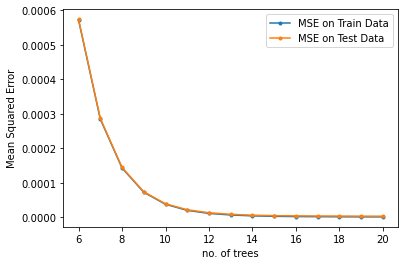

train_scores = [0.18623604324455056, 0.5946208429139779, 0.7963765869067233, 0.896288997721593, 0.9458441757549764, 0.9708460735661927, 0.983547320130628, 0.9899134527732336, 0.9936211922414807, 0.9954946839667695, 0.9964519572748259, 0.9969992088563115, 0.9973415936445732, 0.9977386513401618, 0.9978881787599677]
test_scores = [0.10049559625624249, 0.5501377990316767, 0.7728375662943687, 0.8835703177196257, 0.9380165093763242, 0.9652255293995717, 0.9788682060477528, 0.9856741742479943, 0.9898931165816337, 0.9919010681148086, 0.9928430780317761, 0.9934833636554807, 0.9937433013479852, 0.994277454596945, 0.9944177774496443]
mse_train = [0.0005723545, 0.00028512022, 0.00014321691, 7.294431e-05, 3.809007e-05, 2.0505184e-05, 1.1571862e-05, 7.0942933e-06, 4.486484e-06, 3.1687784e-06, 2.495488e-06, 2.1105827e-06, 1.869769e-06, 1.5905017e-06, 1.4853329e-06]
mse_test = [0.0005745432, 0.00028734186, 0.00014509616, 7.436748e-05, 3.9590905e-05, 2.2211605e-05, 1.3497576e-05, 9.150379e-06, 6.4556007

In [24]:
# Using XGBoost
# -------------

mse_train1, mse_test1, num_trees, RMSE_Train1, RMSE_Test1, train_scores, test_scores = list(), list(), list(), list(),list(), list(),list()

# Split the data into training set and test set 
def Split_Training_Test_fun (df_train_test):
    
    train_set = df_train_test.sample(frac=0.80, random_state=0)
    test_set = df_train_test.drop(train_set.index)
    train_set_RET = train_set.pop('RET')
    test_set_RET = test_set.pop('RET')
    
    # Convert train_set, test_set,train_set_labels and test_set_labels to float32 
    train_set = np.nan_to_num(train_set.astype(np.float32))
    train_set_RET = np.nan_to_num(train_set_RET.astype(np.float32))
    test_set = np.nan_to_num(test_set.astype(np.float32))
    test_set_RET = np.nan_to_num(test_set_RET.astype(np.float32))
    
    return train_set,test_set,train_set_RET,test_set_RET

train_set,test_set,train_set_RET,test_set_RET = Split_Training_Test_fun (df)

model = XGBRegressor(n_estimators = 6)

#def Train_Evaluate_Model_Fun (model,train_set, test_set, train_set_RET, test_set_RET):
    
for iter in range(6, 21, 1):
    
    num_trees.append(iter)
    
    model.fit(train_set, train_set_RET)
    y_train_predicted = model.predict(train_set)
    train_score =  model.score(train_set, train_set_RET)
    train_scores.append(train_score)
    
    y_test_predicted = model.predict(test_set)
    test_score =  model.score(test_set, test_set_RET)
    test_scores.append(test_score)    

    mse_train = mean_squared_error(train_set_RET, y_train_predicted)
    mse_train1.append(mse_train)
    RMSE_Train = np.sqrt(mse_train)
    RMSE_Train1.append (RMSE_Train)
    
    mse_test = mean_squared_error(test_set_RET, y_test_predicted)
    mse_test1.append(mse_test)
    RMSE_Test = np.sqrt(mse_test)
    RMSE_Test1.append (RMSE_Test)
    #print('>%d, train: %.3f, test: %.3f' % (i, train_score, test_score))
    #print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
    model.n_estimators += 1
    #return train_scores, test_scores,mse_train1,mse_test1
    
# Based on the "train_scores" and "test_scores", the performance of the model is improved when 
# the number of trees are increased so the highest "train_scores" and "test_scores" I got "> 99%"
# when the number of trees > 9. Although the y-axis is so small, meaning the deviations shown in
# the plot may not be very significant regarding the underfitting and overfitting as rms for 
# training and test set are so small.  I am looking to find out the best hyperparameters 
# values to get the best performance of the model. Based on what I can start to visually 
# see that there is underfitting when the number of trees <=7, but there is no overfitting.  

    
def plot_fun (num_trees,mse_train1, mse_test1):
    
    pyplot.plot(num_trees, mse_train1, marker='.', label= 'MSE on Train Data')
    pyplot.plot(num_trees, mse_test1, marker='.', label= 'MSE on Test Data')

    # axis labels
    pyplot.xlabel('no. of trees')
    pyplot.ylabel('Mean Squared Error')
    
    # show the legend
    pyplot.legend()
    
    # show the plot
    pyplot.show()


#train_scores, test_scores,mse_train1,mse_test1 = Train_Evaluate_Model_Fun (model,train_set,test_set,train_set_RET,test_set_RET)
plot_fun(num_trees,mse_train1, mse_test1)

print ('train_scores =', train_scores)
print ('test_scores =', test_scores) 
print ('mse_train =', mse_train1)
print ('mse_test =', mse_test1)

print ('RMSE_Train = ', RMSE_Train1)
print ('RMSE_Test = ', RMSE_Test1)


['exret', 0.76570153]
['n', 0.08716007]
['tvol', 0.03938691]
['PERMNO', 0.032763552]
['Day', 0.023158096]
['b_mkt', 0.019912044]
['ivol', 0.01928518]
['R2', 0.008008493]
['alpha', 0.004624057]


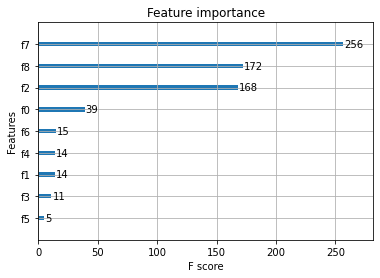

In [25]:
# Finding the importantance variables
# -----------------------------------

# Get feature importance in xgboost and sort it with descending.

sorted_idx = np.argsort(model.feature_importances_)[::-1]

# print all sorted importances and the name of columns together as lists

for index in sorted_idx:
    print([df.columns[index], model.feature_importances_[index]])

# Plot the importances with XGboost built-in function
# Although the 'Day' independent variable has small score, it is the third feature in 
# the importance and has an effect on the performance of the model 

plot_importance(model) # Plot importance based on fitted trees.
plt.show()

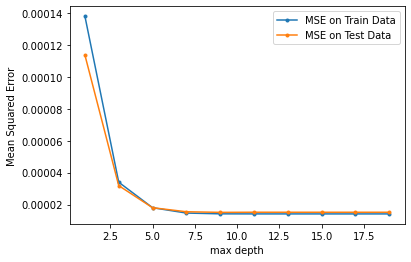

train_scores = [0.8037337737596509, 0.9516509569263574, 0.9743670022564597, 0.9791387065793505, 0.979837099724323, 0.9798943639843126, 0.9799045648539699, 0.9799052522422361, 0.9799052522422361, 0.9799052522422361]
test_scores = [0.822008438088127, 0.9501119039200466, 0.9717823403228305, 0.9757469683245502, 0.9763522077100055, 0.976217915440772, 0.976238972569103, 0.976239840001835, 0.976239840001835, 0.976239840001835]
mse_train = [0.0001380423, 3.400592e-05, 1.8028764e-05, 1.4672625e-05, 1.4181417e-05, 1.414114e-05, 1.4133965e-05, 1.4133481e-05, 1.4133481e-05, 1.4133481e-05]
mse_test = [0.000113689086, 3.1865176e-05, 1.8023553e-05, 1.5491214e-05, 1.5104627e-05, 1.5190403e-05, 1.51769555e-05, 1.5176402e-05, 1.5176402e-05, 1.5176402e-05]
RMSE_Train =  [0.011749141, 0.0058314595, 0.004246029, 0.0038304862, 0.0037658222, 0.0037604708, 0.0037595166, 0.0037594521, 0.0037594521, 0.0037594521]
RMSE_Test =  [0.010662508, 0.005644925, 0.0042454153, 0.003935888, 0.003886467, 0.0038974867, 0.003

In [26]:
# Tuning the hyperparameters is going to be important to see if I can get a highest train_scores
# and test_scores and lowest 'mse_train' and 'mse_test'  

# Here, I put the number of trees 100 because the performance of the model will be better with a big
# number of trees and put different values of 'max_depth' to see if this will help to get a
# better results.

# Here, I used many hyperparameters which are learning_rate,max_depth, n_estimators and subsample
# with a different range of 'max_depth' values. Based on the "train_scores" and "test_scores",
# the performance of the model is improved when max_depth> 3 where the "train_scores" and
# "test_scores are > 97%. As I mentioned above that the deviations shown in the plot may not
# be very significant as they are so small, but based on what I can start to visually see that
# there is underfitting when the 'max_depth' < 3 and there is no overfitting. The best
# performance of the model when the 'max depth' >= 3.


mse_train1, mse_test1,max_depth1, RMSE_Train1, RMSE_Test1, train_scores, test_scores = list(), list(), list(), list(),list(), list(),list()

model = XGBRegressor(learning_rate= 0.04,max_depth= 1,n_estimators= 100,subsample= 0.7)

# Training and Evaluate the model 
# -------------------------------

for iter in range(1, 20, 2):
    
    max_depth1.append(iter)
    
    model.fit(train_set, train_set_RET)
    y_train_predicted = model.predict(train_set)
    train_score =  model.score(train_set, train_set_RET)
    train_scores.append(train_score)
    
    y_test_predicted = model.predict(test_set)
    test_score =  model.score(test_set, test_set_RET)
    test_scores.append(test_score)    

    mse_train = mean_squared_error(train_set_RET, y_train_predicted)
    mse_train1.append(mse_train)
    RMSE_Train = np.sqrt(mse_train)
    RMSE_Train1.append (RMSE_Train)

    mse_test = mean_squared_error(test_set_RET, y_test_predicted)
    mse_test1.append(mse_test)
    RMSE_Test = np.sqrt(mse_test)
    RMSE_Test1.append (RMSE_Test)
    #print('>%d, train: %.3f, test: %.3f' % (i, train_score, test_score))
    #print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
    model.max_depth += 2
    
def plot1_fun (max_depth1,mse_train1, mse_test1):
    #mse_train1 = np.array (mse_train1)
    #mse_test1 = np.array (mse_test1)
    
    pyplot.plot(max_depth1, mse_train1, marker='.', label= 'MSE on Train Data')
    pyplot.plot(max_depth1, mse_test1, marker='.', label= 'MSE on Test Data')

    # axis labels
    pyplot.xlabel('max depth')
    pyplot.ylabel('Mean Squared Error')
    
    # show the legend
    pyplot.legend()
    
    # show the plot
    pyplot.show()


plot1_fun(max_depth1,mse_train1, mse_test1)

print ('train_scores =', train_scores)
print ('test_scores =', test_scores) 
print ('mse_train =', mse_train1)
print ('mse_test =', mse_test1)
print ('RMSE_Train = ', RMSE_Train1)
print ('RMSE_Test = ', RMSE_Test1)


In [27]:
# Using Random Forest 
# -------------------

# Here, I will start to use a random forest instead of XGBoost to see if I will get a better results. 
# Before using Random Forest, I will Remove all observations contain missing values

df_data = df.dropna()
print(df_data)

         PERMNO        n     b_mkt     alpha      ivol      tvol        R2  \
0      0.000000  0.97561  0.140331  0.287234  0.106196  0.105124  0.001492   
1      0.000000  0.98374  0.140352  0.288564  0.106198  0.105129  0.001490   
2      0.000000  0.99187  0.140417  0.288564  0.105978  0.104910  0.001508   
3      0.000000  1.00000  0.140287  0.285904  0.105983  0.104912  0.001470   
4      0.000012  0.97561  0.204323  0.339096  0.121740  0.122920  0.037434   
...         ...      ...       ...       ...       ...       ...       ...   
23354  0.997894  1.00000  0.315750  0.335106  0.090593  0.106922  0.288367   
23355  1.000000  0.97561  0.276083  0.396277  0.120730  0.128307  0.128264   
23356  1.000000  0.98374  0.276083  0.396277  0.120490  0.128047  0.128231   
23357  1.000000  0.99187  0.276408  0.394947  0.120290  0.127872  0.128723   
23358  1.000000  1.00000  0.276126  0.389628  0.120808  0.128288  0.126925   

          exret       Day       RET  
0      0.278190  0.000000

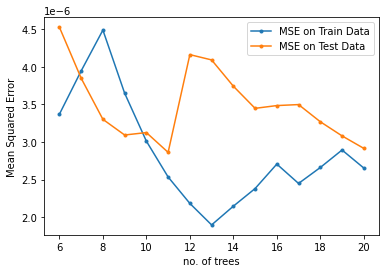

train_scores = [0.9952101052716084, 0.9943906504351121, 0.9936181116015426, 0.9948122894038381, 0.9957209577203092, 0.9963990957968883, 0.9968995201982624, 0.9973064928968673, 0.9969520199146604, 0.9966182982343598, 0.9961548805803011, 0.996521320848524, 0.9962194873011803, 0.9958884314619747, 0.9962293020243639]
test_scores = [0.9929922332233455, 0.994043161700052, 0.9948905287197477, 0.9952136417282628, 0.9951636639601209, 0.9955714246687745, 0.993556759327541, 0.9936657998189405, 0.994207243726267, 0.9946639385842749, 0.9946068974445393, 0.9945863834664155, 0.9949400662523515, 0.9952317728823086, 0.9954888384556039]
mse_train = [3.3700994325221338e-06, 3.946655794624275e-06, 4.490202747583783e-06, 3.6499968219729406e-06, 3.0106711684175824e-06, 2.5335431986723415e-06, 2.1814519551853762e-06, 1.8951119543309532e-06, 2.1445139274263098e-06, 2.379315589921139e-06, 2.7053694306677015e-06, 2.4475474512678146e-06, 2.6599130927483267e-06, 2.892839108684891e-06, 2.6530075979709227e-06]
mse_

In [28]:

# Split the dataset into training and test datasets 

mse_train1, mse_test1,num_trees, RMSE_Train1, RMSE_Test1, train_scores, test_scores = list(), list(), list(), list(),list(), list(),list()

train_set_RF,test_set_RF,train_set_pred,test_set_pred = Split_Training_Test_fun (df_data)

model = RandomForestRegressor (n_estimators = 6, n_jobs=-1, random_state=0)

# Training and Evaluate the model using Random Forest with calculating the train_scores,
# test_scores, 'mse_train', 'mse_test', RMSE_Train and RMSE_Test

# Here, I used many hyperparameters which are n_estimators, n_jobs and random_state. Based on
# the "train_scores" and "test_scores", the performance of the model is good where the accuracy
# is more than 99%. The deviations shown in the plot may not be very significant as they are so
# small (1e-6), but based on what I can start to visually see that there is underfitting When
# the number of trees is < 9 and there is overfitting when the number of trees are between 12 and
# 18. The best performance of the model is when the number of trees are 10, 11,
# 19 or 20 trees. 

for iter in range(6, 21, 1):
    
    num_trees.append(iter)
    
    model.fit(train_set_RF, train_set_pred)
    y_train_predicted = model.predict(train_set_RF)
    train_score =  model.score(train_set_RF, train_set_pred)
    train_scores.append(train_score)
    
    y_test_predicted = model.predict(test_set_RF)
    test_score =  model.score(test_set_RF, test_set_pred)
    test_scores.append(test_score)    

    mse_train = mean_squared_error(train_set_pred, y_train_predicted)
    mse_train1.append(mse_train)
    RMSE_Train = np.sqrt(mse_train)
    RMSE_Train1.append (RMSE_Train)
    
    mse_test = mean_squared_error(test_set_pred, y_test_predicted)
    mse_test1.append(mse_test)
    RMSE_Test = np.sqrt(mse_test)
    RMSE_Test1.append (RMSE_Test)
    #print('>%d, train: %.3f, test: %.3f' % (i, train_score, test_score))
    #print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
    model.n_estimators += 1
    #return train_scores, test_scores,mse_train1,mse_test1

#train_scores, test_scores,mse_train1,mse_test1 = Train_Evaluate_Model_Fun (model,train_set,test_set,train_set_RET,test_set_RET)

plot_fun(num_trees,mse_train1, mse_test1)

print ('train_scores =', train_scores)
print ('test_scores =', test_scores) 
print ('mse_train =', mse_train1)
print ('mse_test =', mse_test1)
print ('RMSE_Train = ', RMSE_Train1)
print ('RMSE_Test = ', RMSE_Test1)


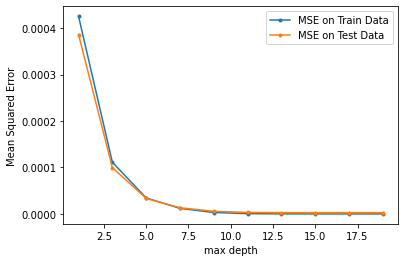

train_scores = [0.39480634247632274, 0.8418757320461886, 0.9510790275633741, 0.9830573787076786, 0.9956920494429555, 0.9991353453628407, 0.9998515270901553, 0.999980371311881, 0.9999982647096388, 0.999999887828263]
test_scores = [0.4019043991339065, 0.8458212448998398, 0.9483461179353768, 0.9794576945177635, 0.9912326417075333, 0.9949271939959584, 0.9957259945236272, 0.9958747155497897, 0.9958382837170127, 0.9958326422746987]
mse_train = [0.0004258053501045119, 0.00011125390763609935, 3.442007618035174e-05, 1.1920578977288458e-05, 3.031010606887429e-06, 6.083582765913809e-07, 1.0446335412062846e-07, 1.3810456062609581e-08, 1.220924757884976e-09, 7.89223831726518e-11]
mse_test = [0.00038646440868640546, 9.962387507198837e-05, 3.337658220450825e-05, 1.3273580226558836e-05, 5.665100919206719e-06, 3.277835466259714e-06, 2.7616839126671175e-06, 2.6655865941918295e-06, 2.689127323618918e-06, 2.692772588129858e-06]
RMSE_Train =  [0.020635051492654724, 0.010547696792954343, 0.00586686254997948

In [29]:
# Use hyperparameters: n_estimators, max_depth, bootstrap, n_jobs and random_state to 
# see if I will get a better results 

mse_train1, mse_test1,max_depth1, RMSE_Train1, RMSE_Test1, train_scores, test_scores = list(), list(), list(), list(),list(), list(),list()

# let's put the number of trees (n_estimators) = 19 and the range of the max_depth values:
# 1,3,5,7,9,11,13,15,17 and 19 and see if I will get a better results. 

model = RandomForestRegressor (n_estimators=19, max_depth=1, bootstrap=False, n_jobs=-1,random_state=0)

# Here, I used many hyperparameters which are n_estimators, max_depth, bootstrap, n_jobs and
# random_state. Based on a different range of values of max_depth and based on the "train_scores"
# and "test_scores", the performance of the model is improved when max_depth > 9 where the
# "train_scores" and "test_scores are > 99%. The deviations shown in the plot may not be very
# significant as they are so small, but based on what I can start to visually see that there is
# underfitting when the 'max_depth' <= 3 and there is no overfitting. The best performance of
# the model when the 'max depth' >= 9.

# Training and Evaluate the model using Random Forest with calculating the train_scores,
# test_scores, mse_train, mse_test, RMSE_Train and RMSE_Test 

for iter in range(1, 20, 2):
    
    max_depth1.append(iter)
    
    model.fit(train_set_RF, train_set_pred)
    y_train_predicted = model.predict(train_set_RF)
    train_score =  model.score(train_set_RF, train_set_pred)
    train_scores.append(train_score)
    
    y_test_predicted = model.predict(test_set_RF)
    test_score =  model.score(test_set_RF, test_set_pred)
    test_scores.append(test_score)    

    mse_train = mean_squared_error(train_set_pred, y_train_predicted)
    mse_train1.append(mse_train)
    RMSE_Train = np.sqrt(mse_train)
    RMSE_Train1.append (RMSE_Train)

    mse_test = mean_squared_error(test_set_pred, y_test_predicted)
    mse_test1.append(mse_test)
    RMSE_Test = np.sqrt(mse_test)
    RMSE_Test1.append (RMSE_Test)
    #print('>%d, train: %.3f, test: %.3f' % (i, train_score, test_score))
    #print("Iteration: {} Train mse: {} Test mse: {}".format(iter, mse_train, mse_test))
    model.max_depth += 2

plot1_fun(max_depth1,mse_train1, mse_test1)

print ('train_scores =', train_scores)
print ('test_scores =', test_scores) 
print ('mse_train =', mse_train1)
print ('mse_test =', mse_test1)
print ('RMSE_Train = ', RMSE_Train1)
print ('RMSE_Test = ', RMSE_Test1)
